In [5]:
import pandas as pd #used for data manupulation
stock_file_path='AAPL.csv' #loading the file path
data_load=pd.read_csv(stock_file_path) #loading the data
print(data_load.head(10)) # printing head 10 rows


         Date       Open       High        Low      Close  Adj Close  \
0  2019-09-03  51.607498  51.744999  51.055000  51.424999  49.761093   
1  2019-09-04  52.097500  52.369999  51.830002  52.297501  50.605358   
2  2019-09-05  53.000000  53.492500  52.877499  53.320000  51.594784   
3  2019-09-06  53.512501  53.605000  53.127499  53.314999  51.589943   
4  2019-09-09  53.709999  54.110001  52.767502  53.542500  51.810078   
5  2019-09-10  53.465000  54.195000  52.927502  54.174999  52.422112   
6  2019-09-11  54.517502  55.927502  54.432499  55.897499  54.088879   
7  2019-09-12  56.200001  56.605000  55.715000  55.772499  53.967918   
8  2019-09-13  55.000000  55.197498  54.255001  54.687500  52.918034   
9  2019-09-16  54.432499  55.032501  54.389999  54.974998  53.196228   

      Volume  
0   80092000  
1   76752400  
2   95654800  
3   77449200  
4  109237600  
5  127111600  
6  177158400  
7  128906800  
8  159053200  
9   84632400  


In [6]:
#Lets start preprocessing
#converting date column in date time format
data_load['Date']=pd.to_datetime(data_load['Date'])
print(data_load.head(10))

        Date       Open       High        Low      Close  Adj Close     Volume
0 2019-09-03  51.607498  51.744999  51.055000  51.424999  49.761093   80092000
1 2019-09-04  52.097500  52.369999  51.830002  52.297501  50.605358   76752400
2 2019-09-05  53.000000  53.492500  52.877499  53.320000  51.594784   95654800
3 2019-09-06  53.512501  53.605000  53.127499  53.314999  51.589943   77449200
4 2019-09-09  53.709999  54.110001  52.767502  53.542500  51.810078  109237600
5 2019-09-10  53.465000  54.195000  52.927502  54.174999  52.422112  127111600
6 2019-09-11  54.517502  55.927502  54.432499  55.897499  54.088879  177158400
7 2019-09-12  56.200001  56.605000  55.715000  55.772499  53.967918  128906800
8 2019-09-13  55.000000  55.197498  54.255001  54.687500  52.918034  159053200
9 2019-09-16  54.432499  55.032501  54.389999  54.974998  53.196228   84632400


In [7]:
# lets deal with missing values 
missing_values=data_load.isnull().sum()
print(missing_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
# Feature Engineering :
#Common Features:
#Moving Averages: These smooth out the price action and help identify trends.
#5-day Moving Average: Short-term trend.
#20-day Moving Average: Mid-term trend.
#Daily Returns: Percentage change between the current close and the previous day’s close.
#Volatility: Measure of price fluctuations over a certain period.

In [9]:
data_load['5_day_movingAverage']=data_load['Close'].rolling(window=5).mean()
data_load['20_day_movingAverage']=data_load['Close'].rolling(window=20).mean()

print(data_load[['Date','Close','5_day_movingAverage','20_day_movingAverage']].head(25))

         Date      Close  5_day_movingAverage  20_day_movingAverage
0  2019-09-03  51.424999                  NaN                   NaN
1  2019-09-04  52.297501                  NaN                   NaN
2  2019-09-05  53.320000                  NaN                   NaN
3  2019-09-06  53.314999                  NaN                   NaN
4  2019-09-09  53.542500            52.780000                   NaN
5  2019-09-10  54.174999            53.330000                   NaN
6  2019-09-11  55.897499            54.049999                   NaN
7  2019-09-12  55.772499            54.540499                   NaN
8  2019-09-13  54.687500            54.814999                   NaN
9  2019-09-16  54.974998            55.101499                   NaN
10 2019-09-17  55.174999            55.301499                   NaN
11 2019-09-18  55.692501            55.260499                   NaN
12 2019-09-19  55.240002            55.154000                   NaN
13 2019-09-20  54.432499            55.103000   

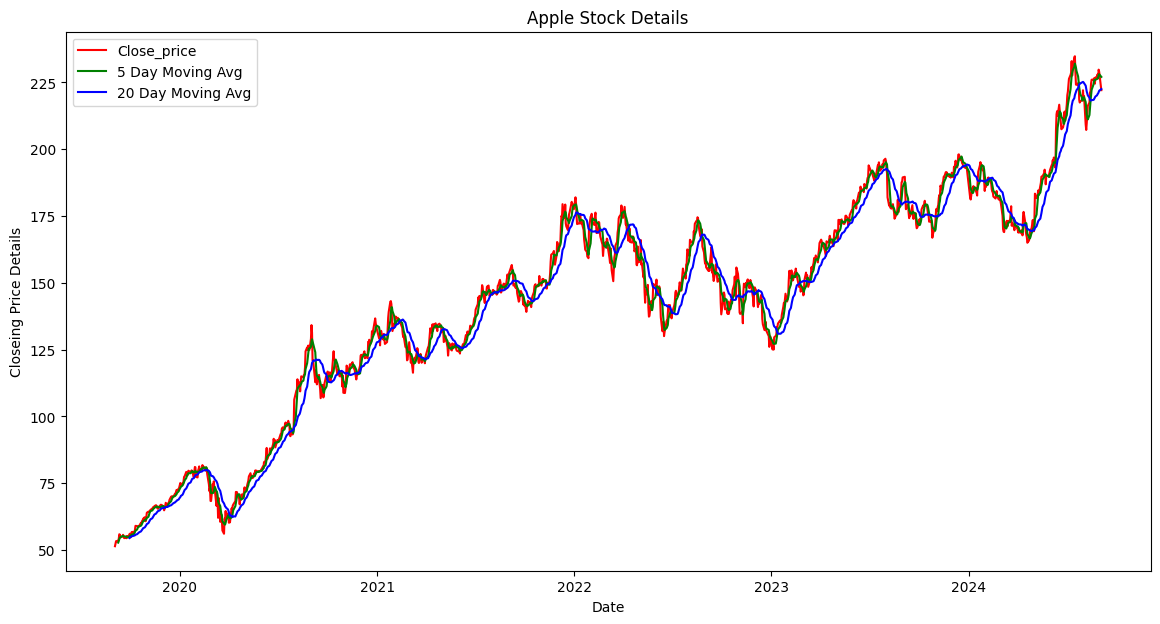

In [10]:
#plotting line graph/chart

import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))

plt.plot(data_load['Date'],data_load['Close'],label='Close_price',color='red') # plotting close price

plt.plot(data_load['Date'],data_load['5_day_movingAverage'],label='5 Day Moving Avg',color='Green') # plotting 5_day_movingAverage

plt.plot(data_load['Date'],data_load['20_day_movingAverage'],label='20 Day Moving Avg',color='blue') # plotting 20_day_movingAverage

plt.title('Apple Stock Details')
plt.xlabel('Date')
plt.ylabel('Closeing Price Details')

plt.legend()

plt.show()


In [11]:
# Let get the daily returns
data_load['daily_returns']=data_load['Close'].pct_change()
print(data_load[['Date','Close','daily_returns']].head(10))

        Date      Close  daily_returns
0 2019-09-03  51.424999            NaN
1 2019-09-04  52.297501       0.016966
2 2019-09-05  53.320000       0.019552
3 2019-09-06  53.314999      -0.000094
4 2019-09-09  53.542500       0.004267
5 2019-09-10  54.174999       0.011813
6 2019-09-11  55.897499       0.031795
7 2019-09-12  55.772499      -0.002236
8 2019-09-13  54.687500      -0.019454
9 2019-09-16  54.974998       0.005257


In [12]:
## Calculate 20-day rolling volatility (standard deviation)

data_load['Volitility/STD']=data_load['daily_returns'].rolling(window=20).std()
print(data_load[['Date','daily_returns','Volitility/STD']].head(30))

         Date  daily_returns  Volitility/STD
0  2019-09-03            NaN             NaN
1  2019-09-04       0.016966             NaN
2  2019-09-05       0.019552             NaN
3  2019-09-06      -0.000094             NaN
4  2019-09-09       0.004267             NaN
5  2019-09-10       0.011813             NaN
6  2019-09-11       0.031795             NaN
7  2019-09-12      -0.002236             NaN
8  2019-09-13      -0.019454             NaN
9  2019-09-16       0.005257             NaN
10 2019-09-17       0.003638             NaN
11 2019-09-18       0.009379             NaN
12 2019-09-19      -0.008125             NaN
13 2019-09-20      -0.014618             NaN
14 2019-09-23       0.004547             NaN
15 2019-09-24      -0.004755             NaN
16 2019-09-25       0.015390             NaN
17 2019-09-26      -0.005158             NaN
18 2019-09-27      -0.004866             NaN
19 2019-09-30       0.023535             NaN
20 2019-10-01       0.002768        0.012817
21 2019-10

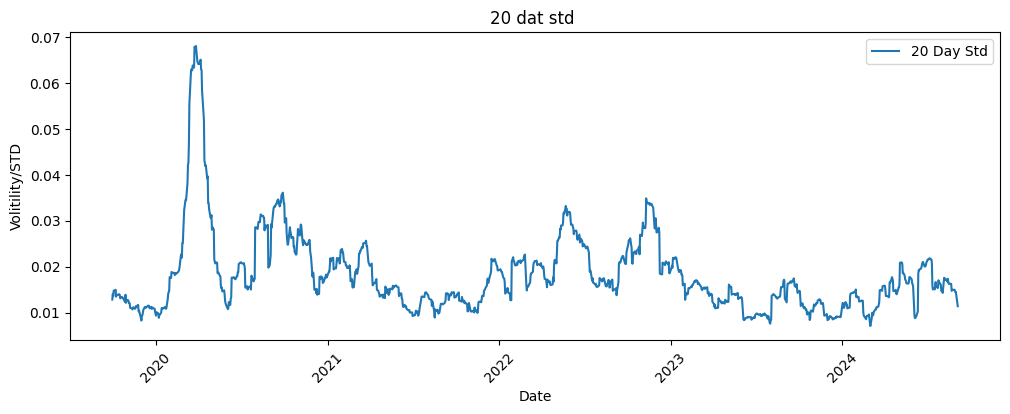

In [13]:
plt.figure(figsize=(12,4))
plt.plot(data_load['Date'],data_load['Volitility/STD'],label='20 Day Std')
plt.xlabel('Date')
plt.ylabel('Volitility/STD')
plt.title('20 dat std ')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Lets proceed with data cleasing 

In [22]:
# Calculate daily returns if not already done
data_load['Daily_Return'] = data_load['Close'].pct_change()

# Calculate the Interquartile Range (IQR) for daily returns
Q1 = data_load['Daily_Return'].quantile(0.25)
Q3 = data_load['Daily_Return'].quantile(0.75)
IQR = Q3 - Q1

#IQR means Measures the spread of the middle 50% of data. 

# Define outliers as those points outside 1.5*IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Here the range is 1.5, that means the data which is more then the 1.5 is considered as the outliers 

# Flag outliers
outliers = data_load[(data_load['Daily_Return'] < lower_bound) | (data_load['Daily_Return'] > upper_bound)]
print("thses are the outlires")
print(outliers)


#The 1.5 IQR rule is a standard method in statistics to detect outliers. It is based on the Interquartile Range (IQR), which measures the spread of the middle 50% of the data.

#Why 1.5?
#IQR (Interquartile Range): This is the range between the 1st quartile (Q1, the 25th percentile) and the 3rd quartile (Q3, the 75th percentile). It measures the spread of the central 50% of the data.
#Outliers are typically defined as data points that fall significantly far from this central range.

#It works well for most data distributions without being overly aggressive in detecting outliers.
#It's a good starting point for identifying unusual data points in the absence of specific domain knowledge.

thses are the outlires
           Date        Open        High         Low       Close   Adj Close  \
104  2020-01-31   80.232498   80.669998   77.072502   77.377502   75.098671   
119  2020-02-24   74.315002   76.044998   72.307503   74.544998   72.521294   
122  2020-02-27   70.275002   71.500000   68.239998   68.379997   66.523651   
124  2020-03-02   70.570000   75.360001   69.430000   74.702499   72.674515   
126  2020-03-04   74.110001   75.849998   73.282501   75.684998   73.630333   
129  2020-03-09   65.937500   69.522499   65.750000   66.542503   64.736038   
130  2020-03-10   69.285004   71.610001   67.342499   71.334999   69.398415   
132  2020-03-12   63.985001   67.500000   62.000000   62.057499   60.372795   
133  2020-03-13   66.222504   69.980003   63.237499   69.492500   67.605957   
134  2020-03-16   60.487499   64.769997   60.000000   60.552502   58.908657   
135  2020-03-17   61.877499   64.402496   59.599998   63.215000   61.498878   
138  2020-03-20   61.794998  

Lets proceed with Time series analysis


We already converted the Date column to a datetime format earlier, but it’s essential that the data is sorted by date.

In [26]:
# Ensure the data is sorted by date
data_load = data_load.sort_values('Date')

print(data_load)

           Date        Open        High         Low       Close   Adj Close  \
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   49.761093   
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   50.605358   
2    2019-09-05   53.000000   53.492500   52.877499   53.320000   51.594784   
3    2019-09-06   53.512501   53.605000   53.127499   53.314999   51.589943   
4    2019-09-09   53.709999   54.110001   52.767502   53.542500   51.810078   
...         ...         ...         ...         ...         ...         ...   
1254 2024-08-27  226.000000  228.850006  224.889999  228.029999  228.029999   
1255 2024-08-28  227.919998  229.860001  225.679993  226.490005  226.490005   
1256 2024-08-29  230.100006  232.919998  228.880005  229.789993  229.789993   
1257 2024-08-30  230.190002  230.399994  227.479996  229.000000  229.000000   
1258 2024-09-03  228.610001  229.000000  222.100601  222.110001  222.110001   

         Volume  5_day_movingAverage  20_day_moving

Lets proceed with Data Splitting

When working with time series data, it's important to split it based on time. We’ll use the first portion for training, the next for validation (if needed), and the most recent data for testing.

In [28]:
# Define the percentage for splitting
train_size = 0.7  # 70% training
validation_size = 0.15  # 15% validation
test_size = 0.15  # 15% testing

# Get the split indices
train_idx = int(len(data_load) * train_size)
val_idx = int(len(data_load) * (train_size + validation_size))

# Split the data
train_data = data_load[:train_idx]
validation_data = data_load[train_idx:val_idx]
test_data = data_load[val_idx:]

# Display the sizes of the splits
print(f"Train data: {len(train_data)}, Validation data: {len(validation_data)}, Test data: {len(test_data)}")

Train data: 881, Validation data: 189, Test data: 189


In [ ]:
#Now that we've split the data into training, validation, and test sets, the next step is to prepare the data for model training and evaluation.

#Step 4: Feature Selection
#We need to decide which features (independent variables) we will use for our model. Some possible features include:

#Close Price
#Moving Averages (5-day, 20-day)
#Daily Returns
#Volatility (if computed)
#For simplicity, let's start by using the Close Price, 5-day Moving Average, and 20-day Moving Average.


In [34]:
# Select features for the model
features = ['Close', '5_day_movingAverage', '20_day_movingAverage']
# Training features and target (we'll predict the 'Close' price for the next day)
X_train = train_data[features]
y_train = train_data['Close'].shift(-1)  # Shifting to predict next day's close price

# Validation and Test sets
X_validation = validation_data[features]
y_validation = validation_data['Close'].shift(-1)


X_test = test_data[features]
y_test = test_data['Close'].shift(-1)

# Drop the last row with NaN due to shifting
X_train = X_train[:-1]
y_train = y_train[:-1]

X_validation = X_validation[:-1]
y_validation = y_validation[:-1]

X_test = X_test[:-1]
y_test = y_test[:-1]

# Display the first few rows to confirm
print(X_train.head(), y_train.head())

       Close  5_day_movingAverage  20_day_movingAverage
0  51.424999                  NaN                   NaN
1  52.297501                  NaN                   NaN
2  53.320000                  NaN                   NaN
3  53.314999                  NaN                   NaN
4  53.542500                52.78                   NaN 0    52.297501
1    53.320000
2    53.314999
3    53.542500
4    54.174999
Name: Close, dtype: float64


In [38]:
# Count the number of missing values (NaNs) in each column
missing_values_train = X_train.isna().sum()
missing_values_validation = X_validation.isna().sum()
missing_values_test = X_test.isna().sum()

# Display the count of missing values
print("Missing values in training set:\n", missing_values_train)
print("Missing values in validation set:\n", missing_values_validation)
print("Missing values in test set:\n", missing_values_test)

Missing values in training set:
 Close                    0
5_day_movingAverage      4
20_day_movingAverage    19
dtype: int64
Missing values in validation set:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64
Missing values in test set:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64


In [40]:
# Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align y_train with X_train after dropping rows

X_validation = X_validation.dropna()
y_validation = y_validation[X_validation.index]  # Align y_validation with X_validation

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Align y_test with X_test

# Confirm no missing values remain
print("Training set missing values after dropping:\n", X_train.isna().sum())
print("Validation set missing values after dropping:\n", X_validation.isna().sum())
print("Test set missing values after dropping:\n", X_test.isna().sum())


Training set missing values after dropping:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64
Validation set missing values after dropping:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64
Test set missing values after dropping:
 Close                   0
5_day_movingAverage     0
20_day_movingAverage    0
dtype: int64


Step 5: Model Selection
For time series prediction, we can start with a simple Linear Regression model. It's a straightforward way to model relationships between features and the target.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on validation data
y_pred_validation = model.predict(X_validation)

# Evaluate the model performance on validation set
mse = mean_squared_error(y_validation, y_pred_validation)
print(f'Validation MSE: {mse}')

Validation MSE: 4.751945372195716


In [44]:

import numpy as np

# Given MSE
mse = 4.751945372195716

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Validation RMSE: {rmse}')


Validation RMSE: 2.179895725073958


In [46]:
# Calculate the average closing price
average_closing_price = data_load['Close'].mean()

# Print the result
print(f'Average Closing Price: {average_closing_price}')


Average Closing Price: 142.76391975297858


this avegaeg closing price and the RMSE of 2.5 tells that the model is doing good


With an Average Closing Price of $142.76, an RMSE of $2.18 is quite small in comparison. Here's why:

$2.18 RMSE represents about 1.5% of the average stock price. This means your model's predictions are off by roughly 1.5% on average, which is generally considered quite good for stock market predictions.

Stock prices can fluctuate significantly on a daily basis, often by more than $2.18, so this RMSE is small compared to the price's inherent volatility.

Your model is performing well based on the RMSE relative to the average stock price. It indicates that the model's predictions are close to the actual values. 

In [52]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict stock prices on the test set
y_pred = model.predict(X_test)

# Display the predicted values
print("Predicted values for the stock prices:\n", y_pred)

# Compare with actual values from the test set
print("Actual values from the test set:\n", y_test.values)


Predicted values for the stock prices:
 [190.95966978 189.27875552 192.99271928 192.02589416 193.8886151
 195.28346091 193.01823636 194.44145799 197.52431303 197.72357227
 197.25432309 195.75282502 196.75458268 194.75447002 194.55257925
 193.48534642 192.92614724 192.94824362 193.31831517 192.312024
 185.83557804 184.40320861 182.05793809 181.17264414 185.08344637
 184.6959537  185.70174549 185.22242707 185.61975455 183.4893526
 182.58240731 188.10484564 190.91098979 193.1977275  194.59079505
 194.17621913 193.97100552 192.37712476 191.70509254 188.18616883
 184.65784847 186.78799825 185.73837433 187.34445914 188.85449178
 189.04221804 188.06409853 188.60294072 187.02870982 185.01042107
 184.09645926 183.75337546 182.2172882  181.43640479 182.09634478
 183.99354646 182.27637084 181.01304894 182.39117937 181.26688067
 180.58844266 179.53988086 175.24461561 170.45254306 169.32736069
 169.02170747 170.46625358 172.29427599 172.80179032 170.91628623
 172.71633997 172.40892068 173.44452702 

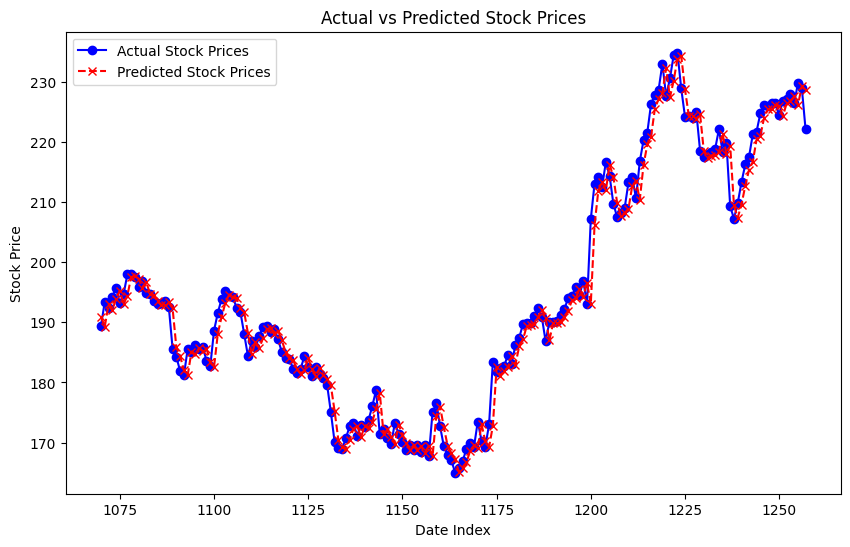

In [54]:
import matplotlib.pyplot as plt

# Create a line graph to compare actual and predicted stock prices
plt.figure(figsize=(10, 6))

# Plot actual stock prices
plt.plot(y_test.index, y_test, label='Actual Stock Prices', color='blue', marker='o')

# Plot predicted stock prices
plt.plot(y_test.index, y_pred, label='Predicted Stock Prices', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Date Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [62]:
# Extract the last row of the dataset (9/3/2024)
last_row = data_load.iloc[-1]

# Create a new row for 9/4/2024
# Calculate features like 'Close', moving averages, and other necessary features
new_data = {}

# Keep the Date for the new prediction day
new_data['Date'] = pd.Timestamp('2024-09-04')

# Use the 'Close' price from 9/3/2024 (last row's closing price) for next day's prediction
new_data['Close'] = last_row['Close']

# Calculate 5-day and 20-day moving averages based on the last available data
new_data['5_day_movingAverage'] = data_load['Close'].tail(5).mean()
new_data['20_day_movingAverage'] = data_load['Close'].tail(20).mean()

# If other features were used in training (e.g., volatility, daily returns), include them here as well
# Example: new_data['Volatility'] = ...
# For now, we'll use moving averages and 'Close' price for simplicity

# Convert the new_data dictionary to a DataFrame
new_data_df = pd.DataFrame([new_data])

# Extract the features used in training (ensure consistency with training data)
X_new = new_data_df[['Close', '5_day_movingAverage', '20_day_movingAverage']]

# Predict the stock price for 9/4/2024
predicted_price = model.predict(X_new)

# Display the predicted price
print(f"Predicted Stock Price for 9/4/2024: {predicted_price[0]}")


Predicted Stock Price for 9/4/2024: 222.13994283043513
